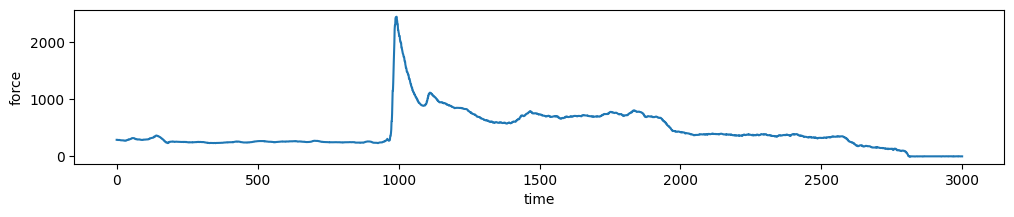

In [1]:
import pandas as pd
df2=pd.read_csv("older_S01_rd1.csv",header=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 2)) 
plt.plot(df2["Time"],df2["Grip Force(g)"])
plt.xlabel("time")
plt.ylabel("force")
plt.show()

In [4]:
df2=pd.read_csv("older_S01_rd1.csv",header=1)
# Create a pandas Series from your list of values
df2_Trig= df2["Trig"]
# Use boolean indexing to find the first index where the value is greater than 15
T1 = df2_Trig.gt(0).idxmax();
T1_force = df2["Grip Force(g)"][T1]
T3_force = T1_force*1.2

subset = df2["Grip Force(g)"][T1:T1+200]
grip_force_data = list(df2["Grip Force(g)"])
max_value = max(subset)
max_index = grip_force_data.index(max_value) + 1
    
T2 = max_index 
T3 = df2["Grip Force(g)"][T2:T2+1000].lt(T3_force).idxmax()
len(df2)

3000

T1: 938 
 T2: 994 
 T2-T1: 56 
 T3: 2593 
 peak force 2439.6
Number of peaks between T2 and T3: 3
Number of valleys between T2 and T3: 3
Number of peaks between T2 and T3: 208
Number of valleys between T2 and T3: 208


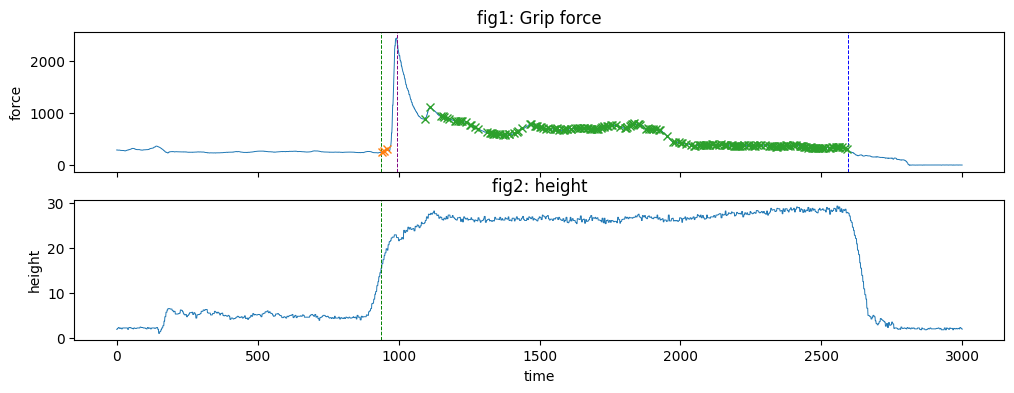

T1: 1044 
 T2: 1099 
 T2-T1: 55 
 T3: 1637 
 peak force 3007.3
Number of peaks between T2 and T3: 7
Number of valleys between T2 and T3: 8
Number of peaks between T2 and T3: 50
Number of valleys between T2 and T3: 50


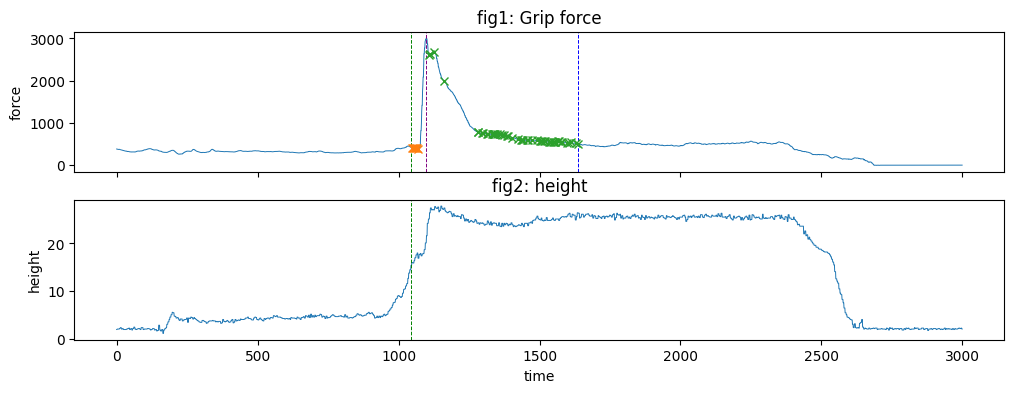

T1: 977 
 T2: 1033 
 T2-T1: 56 
 T3: 1330 
 peak force 2788.8
Number of peaks between T2 and T3: 4
Number of valleys between T2 and T3: 5
Number of peaks between T2 and T3: 16
Number of valleys between T2 and T3: 16


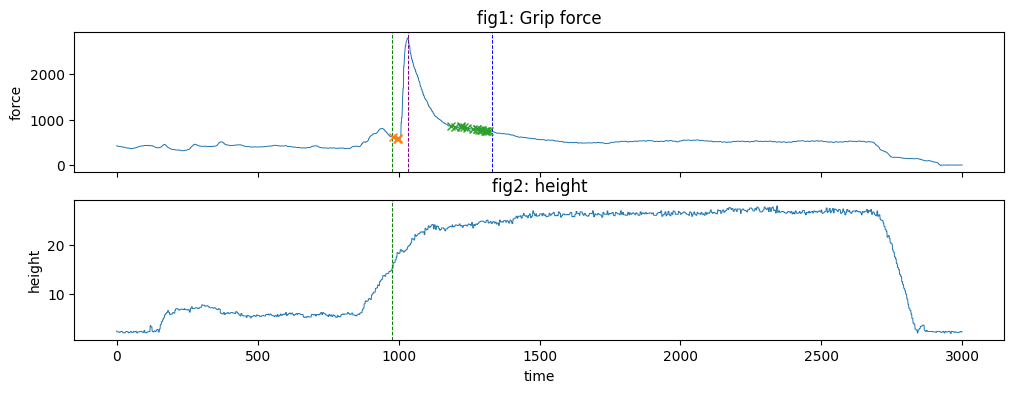

T1: 944 
 T2: 994 
 T2-T1: 50 
 T3: 1113 
 peak force 2877.6
Number of peaks between T2 and T3: 2
Number of valleys between T2 and T3: 3
Number of peaks between T2 and T3: 0
Number of valleys between T2 and T3: 0


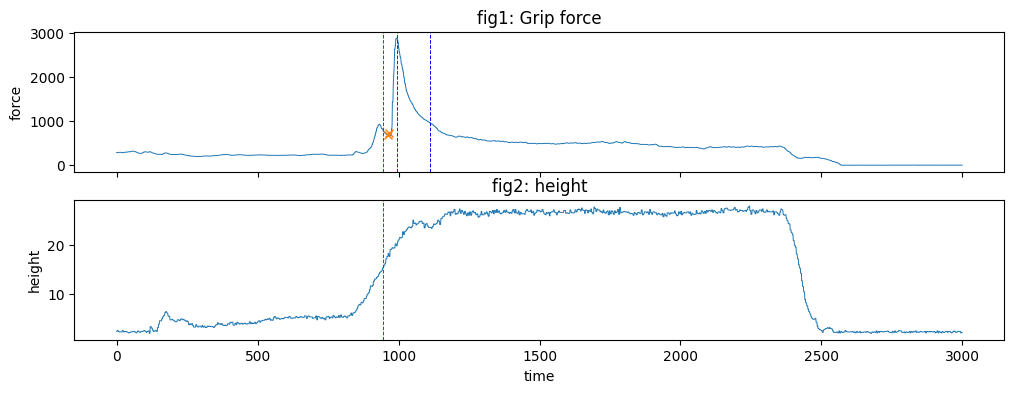

T1: 958 
 T2: 1007 
 T2-T1: 49 
 T3: 1234 
 peak force 2394.3
Number of peaks between T2 and T3: 2
Number of valleys between T2 and T3: 3
Number of peaks between T2 and T3: 14
Number of valleys between T2 and T3: 14


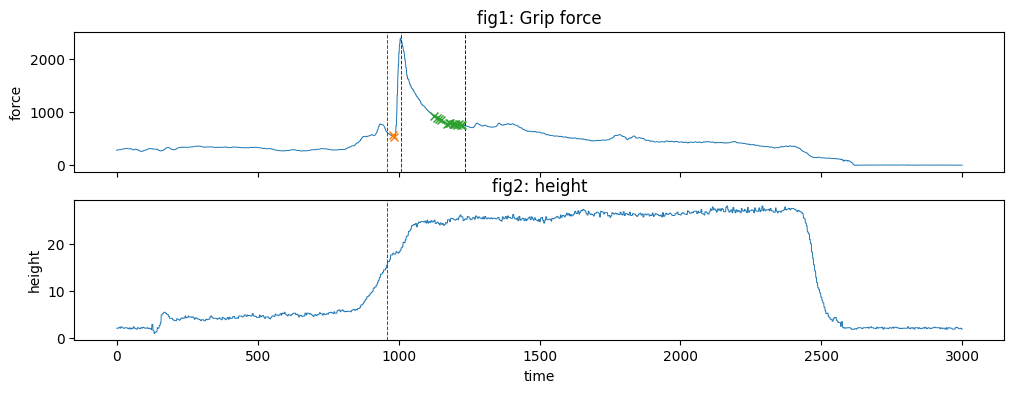

In [7]:
#儲存圖片檔
import pandas as pd
from scipy.signal import find_peaks
dataframes = {}  # 創建一個字典來存儲dataframe

for i in range(1, 6):
    file_name = f"older_S01_rd{i}.csv"
    df = pd.read_csv(file_name, header=1)
    # Create a pandas Series from your list of values
    df_Trig= df["Trig"]
    # Use boolean indexing to find the first index where the value is greater than 15
    T1 = df_Trig.gt(0).idxmax()
    # 計算出T3的力道
    T1_force = df["Grip Force(g)"][T1]
    T3_force = T1_force*1.2
    
    subset = df["Grip Force(g)"][T1:T1+200]
    grip_force_data = list(df["Grip Force(g)"])
    max_value = max(subset)
    max_index = grip_force_data.index(max_value) + 1
    
    T2 = max_index    
    T3 = df["Grip Force(g)"][T2:len(df)].lt(T3_force).idxmax()

    # 找出T1和T2之間的波峰
    force_between_T1_T2 = df["Grip Force(g)"][T1:T2]
    peaks_T1T2, _ = find_peaks(force_between_T1_T2)
    # 找出T1和T2之間的波谷（反轉數據來找）
    valleys_T1T2, _ = find_peaks(-force_between_T1_T2)
    

    # 找出T2和T3之間的波峰
    force_between_T2_T3 = df["Grip Force(g)"][T2:T3]
    peaks_T2T3, _ = find_peaks(force_between_T2_T3)
    # 找出T2和T3之間的波谷（反轉數據來找）
    valleys_T2T3, _ = find_peaks(-force_between_T2_T3)
    
    print("T1:",T1,"\n","T2:",T2,"\n","T2-T1:",T2-T1,"\n","T3:",T3,"\n","peak force",max_value)
    print("Number of peaks between T2 and T3:", len(peaks_T1T2))
    print("Number of valleys between T2 and T3:", len(valleys_T1T2))
    print("Number of peaks between T2 and T3:", len(peaks_T2T3))
    print("Number of valleys between T2 and T3:", len(valleys_T2T3))
    
    fig, axs = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
    # 繪製第一個子圖
    axs[0].plot(df["Time"],df["Grip Force(g)"],linewidth=0.7)
    axs[0].set_ylabel('force')
    axs[0].set_title('fig1: Grip force')
    # 在第一個子圖上添加虛線
    axs[0].axvline(x=T1, color='green', linestyle='--', linewidth=0.7)
    axs[0].axvline(x=T2, color='purple', linestyle='--', linewidth=0.7)
    axs[0].axvline(x=T3, color='blue', linestyle='--', linewidth=0.7)
    # 在第一個子圖上標記波峰和波谷
    axs[0].plot(df["Time"][T1:T2].iloc[peaks_T1T2], force_between_T1_T2.iloc[peaks_T1T2], "x")    
    axs[0].plot(df["Time"][T2:T3].iloc[peaks_T2T3], force_between_T2_T3.iloc[peaks_T2T3], "x")
   # axs[0].plot(df["Time"][T2:T3].iloc[valleys], force_between_T2_T3.iloc[valleys], "o")

    # 繪製第二個子圖
    axs[1].plot(df["Time"],df["Height (cm)"],linewidth=0.7)
    axs[1].set_ylabel('height')
    axs[1].set_title('fig2: height')
    # 在第二個子圖上添加虛線
    axs[1].axvline(x=T1, color='green', linestyle='--', linewidth=0.7)
    
    plt.xlabel("time")
    plt.savefig(f'older_rd{i}.jpg')
   # plt.subplots(figsize=(15, 50))
    plt.show()

In [10]:
# 儲存記錄檔

results = []  # 創建一個列表來存儲每次迴圈的結果

for i in range(1, 6):
    file_name = f"older_S01_rd{i}.csv"
    df = pd.read_csv(file_name, header=1)
    
    # 從DataFrame中取出Height列
    df_Trig= df["Trig"]
    
    # 找到Height大於15的第一個索引
    T1 = df_Trig.gt(0).idxmax()

    # 計算出T3
    T1_force = df["Grip Force(g)"][T1]
    T3_force = T1_force*1.2
    T3 = df["Grip Force(g)"][T2:len(df)].lt(T3_force).idxmax()    

    # 找出T1和T2之間的波峰
    force_between_T1_T2 = df["Grip Force(g)"][T1:T2]
    peaks_T1T2, _ = find_peaks(force_between_T1_T2)
    # 找出T1和T2之間的波谷（反轉數據來找）
    valleys_T1T2, _ = find_peaks(-force_between_T1_T2)
    count_peaks_T1T2 = len(peaks_T1T2)
    count_valleys_T1T2 = len(valleys_T1T2)
    

    # 找出T2和T3之間的波峰
    force_between_T2_T3 = df["Grip Force(g)"][T2:T3]
    peaks_T2T3, _ = find_peaks(force_between_T2_T3)
    # 找出T2和T3之間的波谷（反轉數據來找）
    valleys_T2T3, _ = find_peaks(-force_between_T2_T3)
    count_peaks_T2T3 = len(peaks_T2T3)
    count_valleys_T2T3 = len(valleys_T2T3)
    
    
    # 從Grip Force列取出T1之後100個數據
    subset = df["Grip Force(g)"][T1:T1+200]
    grip_force_data = list(df["Grip Force(g)"])
    
    # 找到subset中的最大值和相對應的索引
    max_value = max(subset)
    max_index = grip_force_data.index(max_value) + 1
    T2 = max_index
    
    # 計算T2-T1的值
    delta_T = max_index - T1
    
    # 將計算結果添加到列表中
    results.append((T1,T2,delta_T,T3, max_value,count_peaks_T1T2,count_valleys_T1T2,count_peaks_T2T3,count_valleys_T2T3))

# 將結果轉換為DataFrame
results_df = pd.DataFrame(results, columns=["T1","T2","T2-T1","T3", "peak force","Number of peaks between T1 and T2","Number of peaks between T1 and T2","Number of peaks between T2 and T3","Number of valleys between T2 and T3"])

# 將結果儲存為Excel檔案
results_df.to_csv("results_rd.csv", index=False)
results_df 

,T1,T2,T2-T1,T3,peak force,Number of peaks between T1 and T2,Number of peaks between T1 and T2,Number of peaks between T2 and T3,Number of valleys between T2 and T3
0,938,994,56,2593,2439.6,4,3,208,208
1,1044,1099,55,994,3007.3,0,0,0,0
2,977,1033,56,1330,2788.8,5,5,16,16
3,944,994,50,1113,2877.6,3,3,0,0
4,958,1007,49,1234,2394.3,2,3,15,14
